# Breast Cancer Dataset

## Introduction

### Load Data

In [2]:
import pandas as pd
import numpy as np

# Define the absolute paths for the files
molecules_path = "/Users/rachaelchew/Downloads/Minerva/Buenos Aires/Multiomix/Datasets Minerva/Breast Invasive Carcinoma (TCGA, PanCancer Atlas)/molecules_df.csv"
clinical_df_path = "/Users/rachaelchew/Downloads/Minerva/Buenos Aires/Multiomix/Datasets Minerva/Breast Invasive Carcinoma (TCGA, PanCancer Atlas)/clinical_df.csv"
clinical_data_path = "/Users/rachaelchew/Downloads/Minerva/Buenos Aires/Multiomix/Datasets Minerva/Breast Invasive Carcinoma (TCGA, PanCancer Atlas)/clinical_data.npy"

# Load the data using pandas and numpy
molecules_data = pd.read_csv(molecules_path, index_col=0)
clinical_df = pd.read_csv(clinical_df_path, index_col=0)
clinical_data = np.load(clinical_data_path)

In [3]:
# Display the first few rows of each dataset
print("Molecules Data:")
print(molecules_data.head())


Molecules Data:
                 TCGA-3C-AAAU  TCGA-3C-AALI  TCGA-3C-AALJ  TCGA-3C-AALK  \
Standard_Symbol                                                           
UBE2Q2P2               1.0262        1.4779        0.5227        0.7937   
HMGB1P1               -1.7019       -1.0047        0.9112        0.7417   
RNU12-2P              -1.9713        0.6577       -1.9713       -0.7346   
SSX9P                 -1.0279       -0.5659       -1.0279       -1.0279   
EZHIP                  0.0599        3.6512       -0.8451       -0.8451   

                 TCGA-4H-AAAK  TCGA-5L-AAT0  TCGA-5T-A9QA  TCGA-A1-A0SB  \
Standard_Symbol                                                           
UBE2Q2P2               1.1927        1.1036        0.4850        1.1889   
HMGB1P1               -0.5515        0.1845        0.0387        0.2291   
RNU12-2P              -0.7049       -1.9713       -0.4685       -0.6428   
SSX9P                 -1.0279       -1.0279       -1.0279       -1.0279   
EZHIP   

In [4]:
print("\nClinical DataFrame:")
print(clinical_df.head())


Clinical DataFrame:
              OS_STATUS   OS_MONTHS
PATIENT_ID                         
TCGA-3C-AAAU      False  133.050597
TCGA-3C-AALI      False  131.669790
TCGA-3C-AALJ      False   48.459743
TCGA-3C-AALK      False   47.604958
TCGA-4H-AAAK      False   11.440971


In [5]:
print("\nClinical Data Array:")
print(clinical_data[:5])  # Display the first 5 rows of the numpy array


Clinical Data Array:
[(False, 133.0505967 ) (False, 131.6697899 ) (False,  48.45974291)
 (False,  47.60495775) (False,  11.44097051)]


### Exploratory Data Analysis (EDA)

#### Basic Statistical Summary

In [14]:
# Molecular Data Statistics
print("Molecular Data Description:")
print(molecules_data.describe())

# Clinical Data Statistics
print("\nClinical Data Description:")
print(clinical_df.describe())


Molecular Data Description:
       TCGA-3C-AAAU  TCGA-3C-AALI  TCGA-3C-AALJ  TCGA-3C-AALK  TCGA-4H-AAAK  \
count  17681.000000  17681.000000  17681.000000  17681.000000  17681.000000   
mean      -0.210783     -0.133749     -0.244915     -0.159037     -0.210820   
std        5.787157      5.796520      5.776948      5.736587      5.737341   
min     -728.237000   -728.237000   -728.237000   -728.237000   -728.237000   
25%       -0.957500     -0.882100     -0.971000     -0.620900     -0.685800   
50%       -0.207900     -0.133200     -0.181900     -0.059200     -0.121700   
75%        0.631000      0.685000      0.566900      0.477900      0.413900   
max        7.369500     10.645300      5.842300      4.387800      3.988400   

       TCGA-5L-AAT0  TCGA-5T-A9QA  TCGA-A1-A0SB  TCGA-A1-A0SD  TCGA-A1-A0SE  \
count  17681.000000  17681.000000  17681.000000  17681.000000  17681.000000   
mean      -0.151950     -0.553281     -0.258405     -0.180815     -0.237498   
std        5.740224    

#### Molecular Expression Distribution


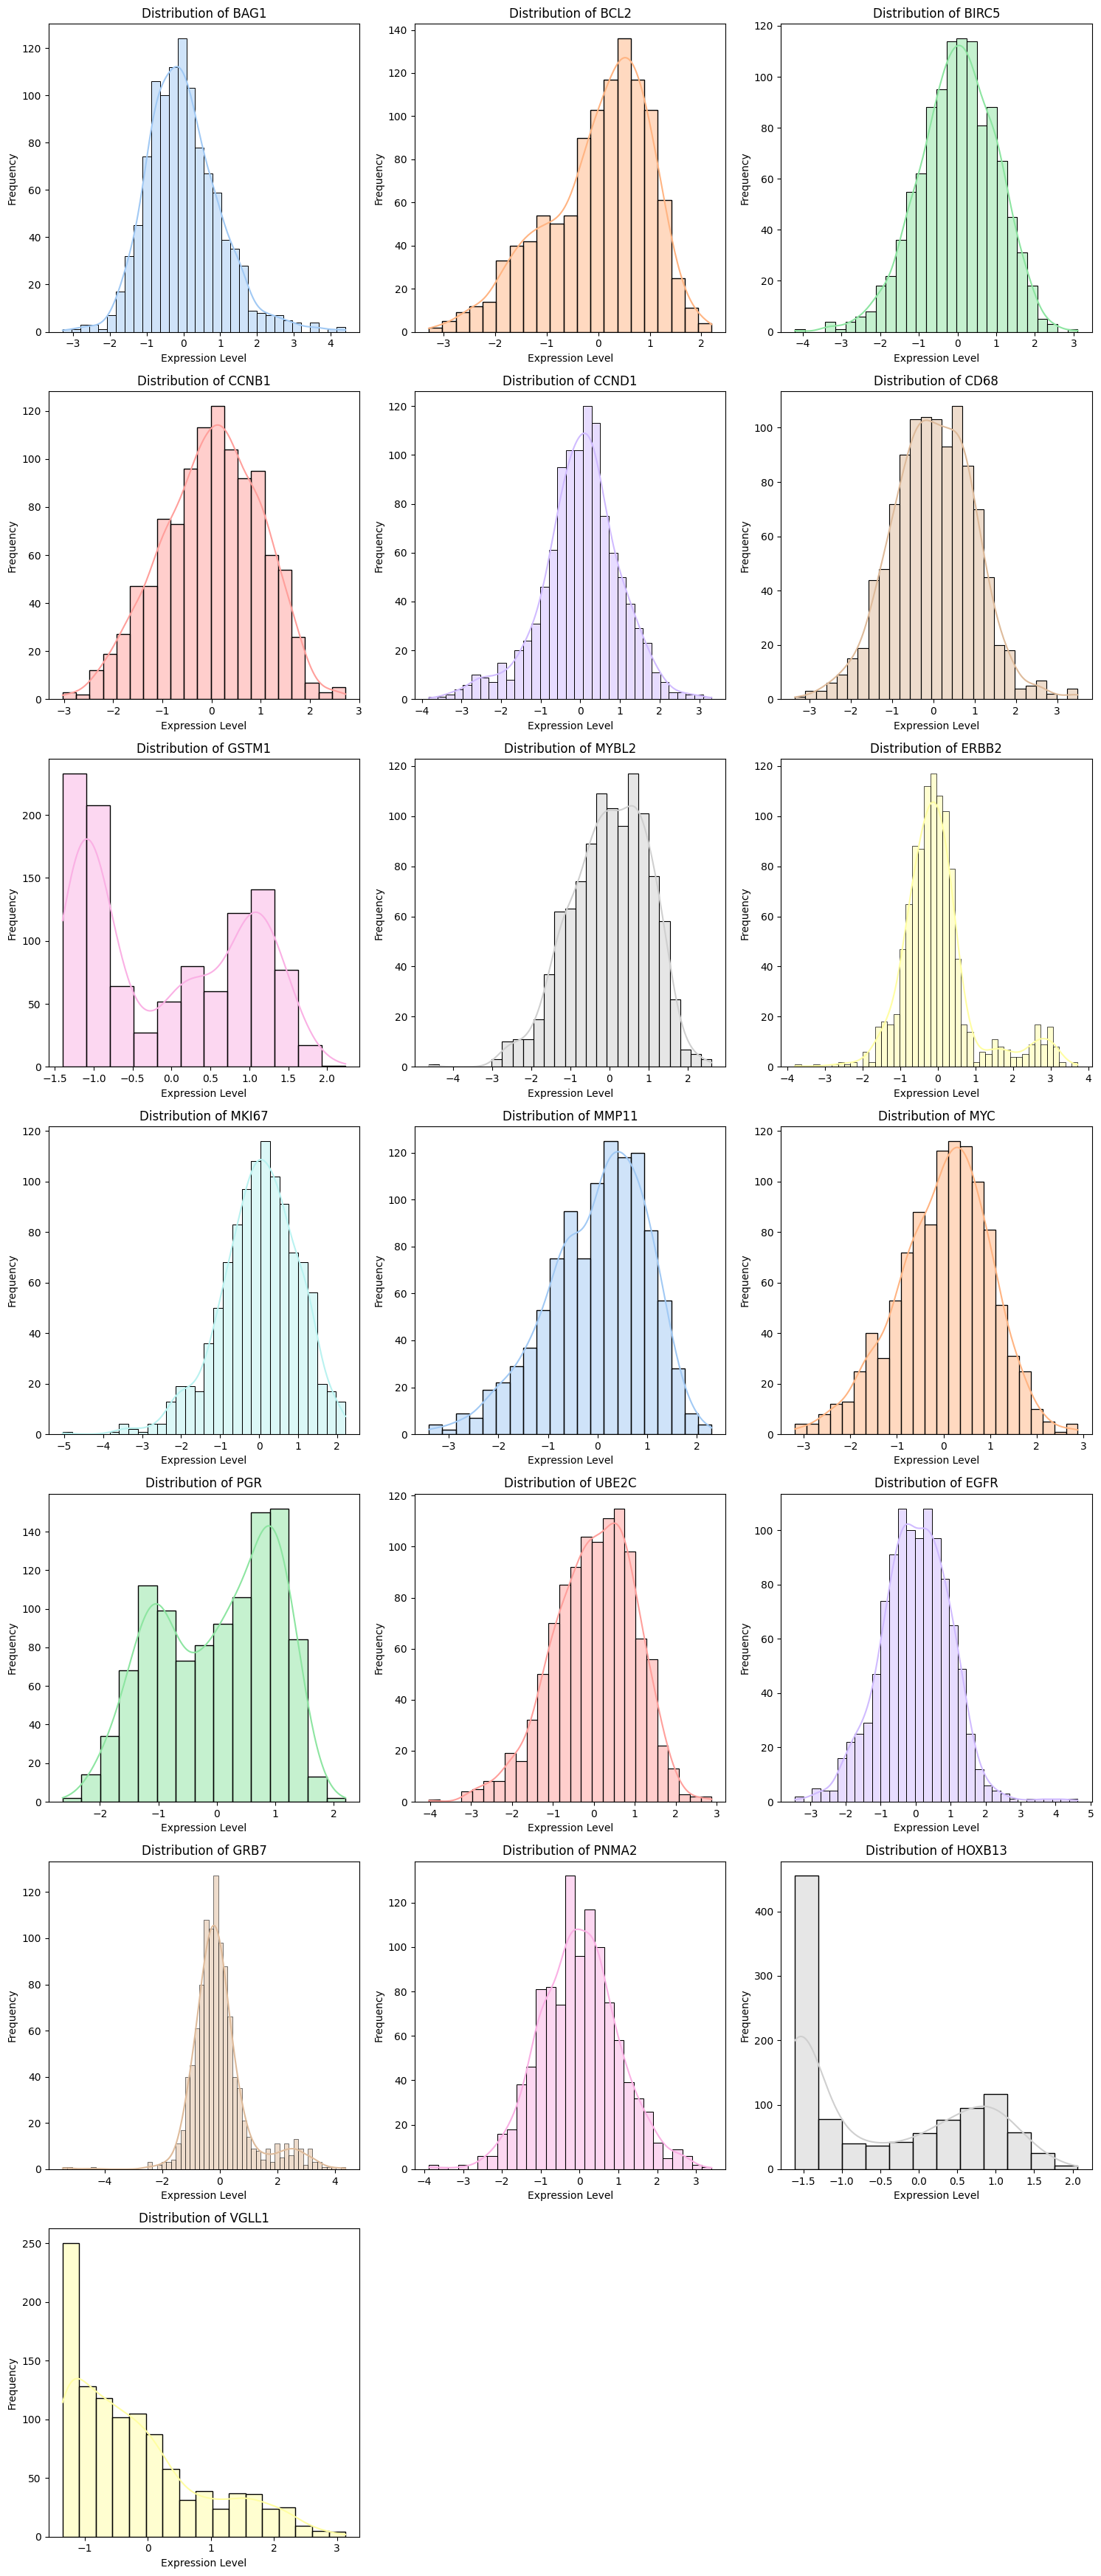

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Histograms for a subset of genes
selected_genes = ['BAG1', 'BCL2', 'BIRC5', 'CCNB1', 'CCND1', 'CD68', 'GSTM1', 'MYBL2', 
                  'ERBB2', 'MKI67', 'MMP11', 'MYC', 'PGR', 'UBE2C', 'EGFR', 
                  'GRB7', 'PNMA2', 'HOXB13', 'VGLL1']

# Calculating the number of rows needed (each row has 3 plots)
num_genes = len(selected_genes)
num_rows = (num_genes + 2) // 3  # +2 for ceiling division

# Define a list of pastel colors
pastel_colors = sns.color_palette("pastel", n_colors=len(selected_genes))

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the height as needed

# Create a subplot for each gene
for i, gene in enumerate(selected_genes):
    plt.subplot(num_rows, 3, i + 1)  # num_rows rows, 3 columns, ith subplot
    sns.histplot(molecules_data.loc[gene], kde=True, color=pastel_colors[i])
    plt.title(f"Distribution of {gene}")
    plt.xlabel('Expression Level')
    plt.ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


#### Survival Time Distribution

Plot the distribution of survival times to understand the spread and skewness.

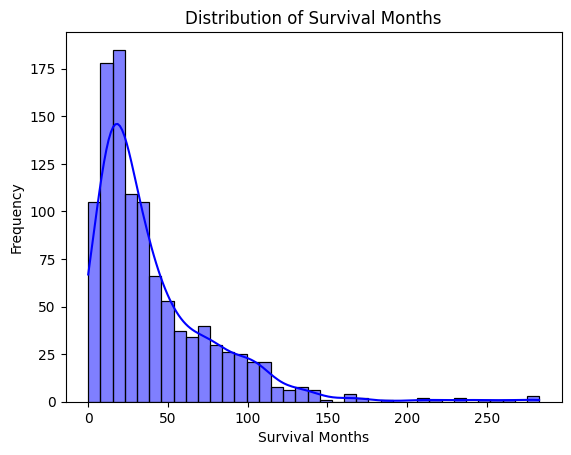

In [39]:
sns.histplot(clinical_df['OS_MONTHS'], kde=True, color='blue')
plt.title('Distribution of Survival Months')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.show()


#### Correlation Heatmap

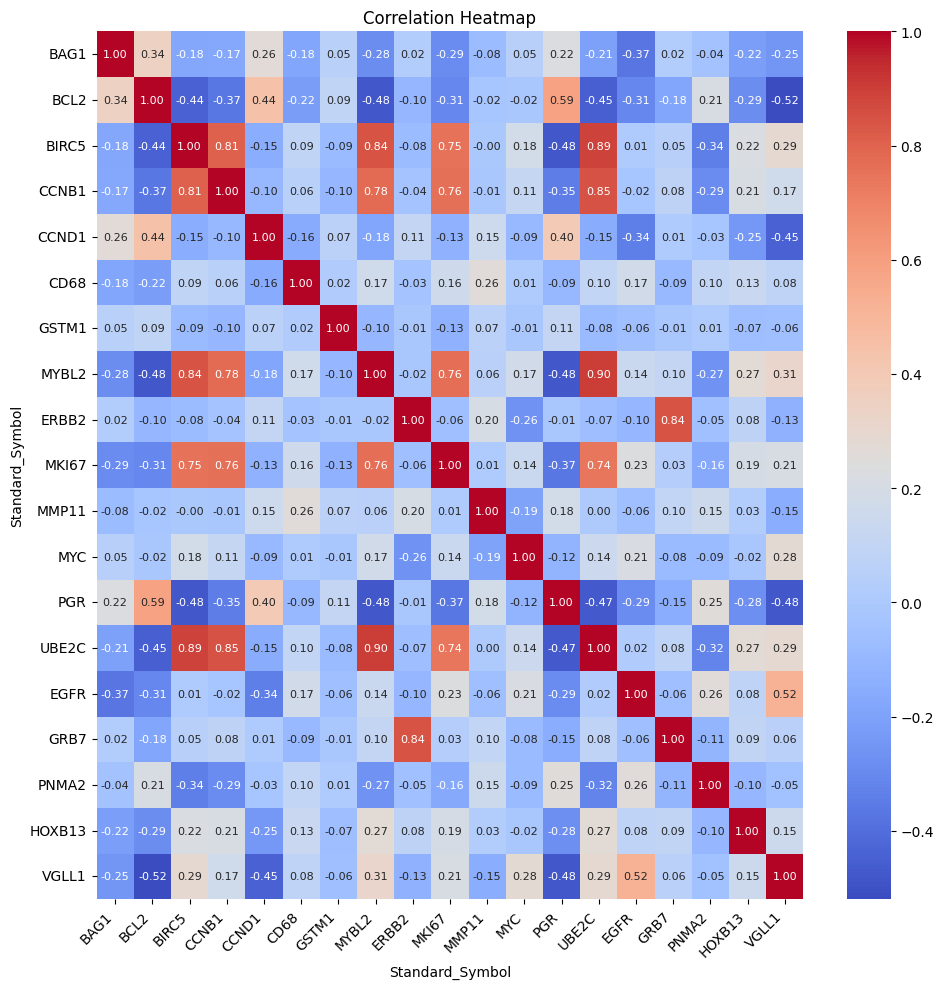

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'molecules_data' and 'selected_genes' are defined as before
correlation_matrix = molecules_data.loc[selected_genes].transpose().corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap with annotation
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 8})

# Adjust the plot
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# If you still want to display the plot, uncomment the next line
plt.show()


####

In [41]:
import pandas as pd
import numpy as np

# Assuming 'correlation_matrix' is already defined

def get_highly_correlated_genes(correlation_matrix, threshold=0.8):
    # Create a list to hold tuples of highly correlated genes
    high_corr_pairs = []

    # Iterate over the upper triangle of the correlation matrix
    for i in range(correlation_matrix.shape[0]):
        for j in range(i+1, correlation_matrix.shape[1]):
            if np.abs(correlation_matrix.iloc[i, j]) >= threshold:
                # Append any high correlations to the list
                high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

    # Convert the list of tuples into a DataFrame
    high_corr_pairs_df = pd.DataFrame(high_corr_pairs, columns=['Gene 1', 'Gene 2', 'Correlation'])

    # Sort the DataFrame by the absolute value of the correlation in descending order
    high_corr_pairs_df = high_corr_pairs_df.reindex(high_corr_pairs_df.Correlation.abs().sort_values(ascending=False).index)

    return high_corr_pairs_df

# Use the function with your correlation matrix
high_corr_gene_pairs = get_highly_correlated_genes(correlation_matrix, threshold=0.8)

# Display the gene pairs with the highest correlations
print(high_corr_gene_pairs)


  Gene 1 Gene 2  Correlation
4  MYBL2  UBE2C     0.899499
2  BIRC5  UBE2C     0.889456
3  CCNB1  UBE2C     0.849843
5  ERBB2   GRB7     0.844180
1  BIRC5  MYBL2     0.840869
0  BIRC5  CCNB1     0.809348


How might these values be relevant in my analysis?

1. **MYBL2 and UBE2C (Correlation: 0.899499)**: This pair has the highest correlation, indicating a strong positive relationship. Since they move together, these genes could be part of the same biological pathway or process, or they could be co-regulated. For clustering, including both genes might not be necessary, as they may contribute redundant information.

2. **BIRC5 and UBE2C (Correlation: 0.889456)**: Another pair with a high correlation.

3. **CCNB1 and UBE2C (Correlation: 0.849843)**: This also indicates a strong relationship. It seems UBE2C consistently shows up in highly correlated pairs, suggesting it is a central player in the network of these genes.

4. **ERBB2 and GRB7 (Correlation: 0.844180)**: This correlation is particularly interesting as ERBB2 (HER2) is a well-known gene involved in breast cancer, and its correlation with GRB7 could suggest a functional linkage or a co-amplification event, as they are located close to each other on chromosome 17.

5. **BIRC5 and MYBL2 (Correlation: 0.840869)**: Similar to the previous pairs, this high correlation might indicate a close biological relationship.

6. **BIRC5 and CCNB1 (Correlation: 0.809348)**: Another strong correlation, suggesting these genes could be part of the same cellular processes, such as cell cycle regulation.

#### Boxplot for Gene Expressions by Survival Status

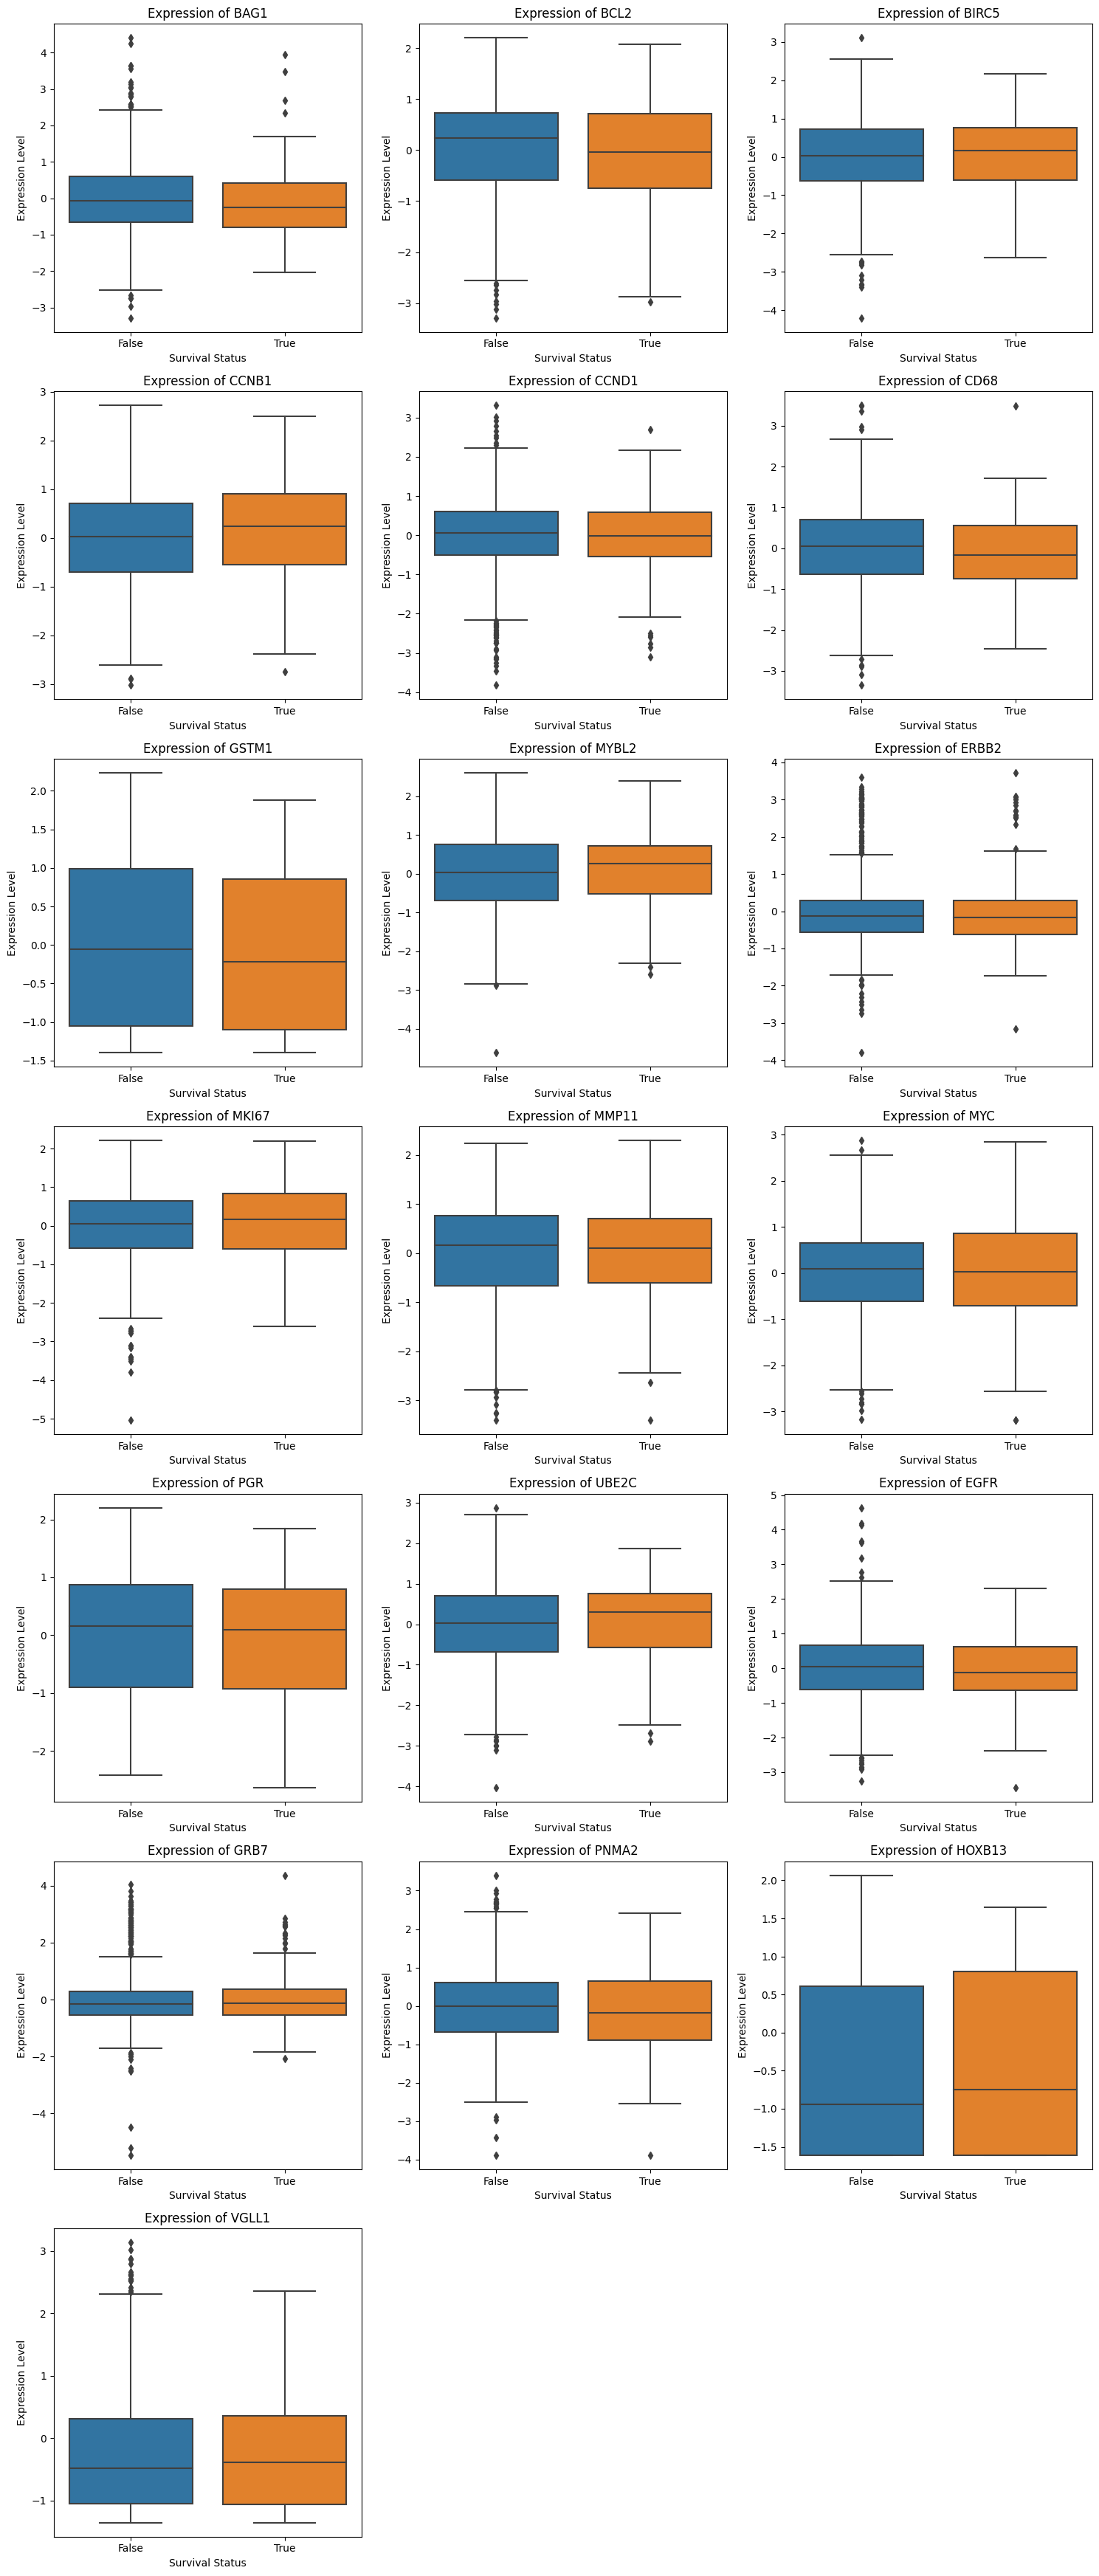

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Merge the clinical data with molecular data for selected genes
merged_data = pd.concat([clinical_df, molecules_data.loc[selected_genes].transpose()], axis=1)

# Determine the number of rows needed for the subplots (each row has 3 plots)
num_genes = len(selected_genes)
num_rows = (num_genes + 2) // 3  # +2 for ceiling division if num_genes is not a multiple of 3

# Set up the matplotlib figure
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the height as needed

# Create a boxplot for each gene
for i, gene in enumerate(selected_genes):
    plt.subplot(num_rows, 3, i + 1)  # num_rows rows, 3 columns, ith subplot
    sns.boxplot(x='OS_STATUS', y=gene, data=merged_data)
    plt.title(f'Expression of {gene}')
    plt.xlabel('Survival Status')
    plt.ylabel('Expression Level')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Clustering Algorithm Exploration

### K-Means Clustering

In [6]:
# List of biomarkers of interest
biomarkers = ['BAG1', 'BCL2', 'BIRC5', 'CCNB1', 'CCND1', 'CD68', 'GSTM1', 'MYBL2', 
                  'ERBB2', 'MKI67', 'MMP11', 'MYC', 'PGR', 'UBE2C', 'EGFR', 
                  'GRB7', 'PNMA2', 'HOXB13', 'VGLL1']

# Verify if biomarkers exist in the index, if not, this will avoid KeyError
available_biomarkers = [gene for gene in biomarkers if gene in molecules_data.index]


# Filter the molecules_data DataFrame
filtered_data = molecules_data.loc[biomarkers].transpose()
print("Filtered Data:")
print(filtered_data.head())


Filtered Data:
Standard_Symbol    BAG1    BCL2   BIRC5   CCNB1   CCND1    CD68   GSTM1  \
TCGA-3C-AAAU     0.2954  0.6255  0.2233  0.5413  1.7699 -1.1527  1.1583   
TCGA-3C-AALI    -1.3304 -1.3679  0.9723  1.1127 -0.6438 -0.0611  0.1417   
TCGA-3C-AALJ     0.2765  0.7101  0.8357  1.0678  0.2348  0.1243 -0.7207   
TCGA-3C-AALK     0.0647  0.5666  0.4984 -0.1168  0.9505 -0.6038  1.3479   
TCGA-4H-AAAK     0.5182  0.2710 -0.3981 -0.4833  0.2237 -0.1239  1.2838   

Standard_Symbol   MYBL2   ERBB2   MKI67   MMP11     MYC     PGR   UBE2C  \
TCGA-3C-AAAU     0.1068 -0.1182  0.5246  0.6602  0.4083  0.6366  0.0861   
TCGA-3C-AALI     1.5512  3.0742  0.3887  0.5124 -2.5242 -1.2236  0.9486   
TCGA-3C-AALJ     1.2360  0.3085 -0.5872  0.8670 -0.2928 -0.0271  0.8299   
TCGA-3C-AALK    -0.2228  1.4467 -0.3844  0.4176 -0.1235  0.6297 -0.0222   
TCGA-4H-AAAK    -0.2594  0.4051 -0.3210  1.5119  1.1285  0.9187 -0.4422   

Standard_Symbol    EGFR    GRB7   PNMA2  HOXB13   VGLL1  
TCGA-3C-AAAU    -0.7873  

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scale the filtered data BEFORE clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Define the number of clusters
k = 4

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the filtered data
filtered_data['Cluster'] = clusters
print("\nData with Cluster Labels:")
print(filtered_data.head())



Data with Cluster Labels:
Standard_Symbol    BAG1    BCL2   BIRC5   CCNB1   CCND1    CD68   GSTM1  \
TCGA-3C-AAAU     0.2954  0.6255  0.2233  0.5413  1.7699 -1.1527  1.1583   
TCGA-3C-AALI    -1.3304 -1.3679  0.9723  1.1127 -0.6438 -0.0611  0.1417   
TCGA-3C-AALJ     0.2765  0.7101  0.8357  1.0678  0.2348  0.1243 -0.7207   
TCGA-3C-AALK     0.0647  0.5666  0.4984 -0.1168  0.9505 -0.6038  1.3479   
TCGA-4H-AAAK     0.5182  0.2710 -0.3981 -0.4833  0.2237 -0.1239  1.2838   

Standard_Symbol   MYBL2   ERBB2   MKI67   MMP11     MYC     PGR   UBE2C  \
TCGA-3C-AAAU     0.1068 -0.1182  0.5246  0.6602  0.4083  0.6366  0.0861   
TCGA-3C-AALI     1.5512  3.0742  0.3887  0.5124 -2.5242 -1.2236  0.9486   
TCGA-3C-AALJ     1.2360  0.3085 -0.5872  0.8670 -0.2928 -0.0271  0.8299   
TCGA-3C-AALK    -0.2228  1.4467 -0.3844  0.4176 -0.1235  0.6297 -0.0222   
TCGA-4H-AAAK    -0.2594  0.4051 -0.3210  1.5119  1.1285  0.9187 -0.4422   

Standard_Symbol    EGFR    GRB7   PNMA2  HOXB13   VGLL1  Cluster  
TCGA

/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [8]:
from sklearn.metrics import silhouette_score

# Calculate inertia and silhouette score
inertia = kmeans.inertia_
silhouette = silhouette_score(filtered_data.drop('Cluster', axis=1), clusters)

print("\nMetrics:")
print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette}")



Metrics:
Inertia: 13270.321034238255
Silhouette Score: 0.15520768477028224


/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

Inertia for 1 clusters: 22491.78356586422
Inertia for 2 clusters: 18098.9238690196
Inertia for 3 clusters: 15162.701732558364
Inertia for 4 clusters: 13624.54073387957
Inertia for 5 clusters: 13084.7251925676
Inertia for 6 clusters: 12555.407288815632
Inertia for 7 clusters: 12186.443210711055
Inertia for 8 clusters: 11873.765405297068
Inertia for 9 clusters: 11590.14220073687


/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

Inertia for 10 clusters: 11331.2413057593


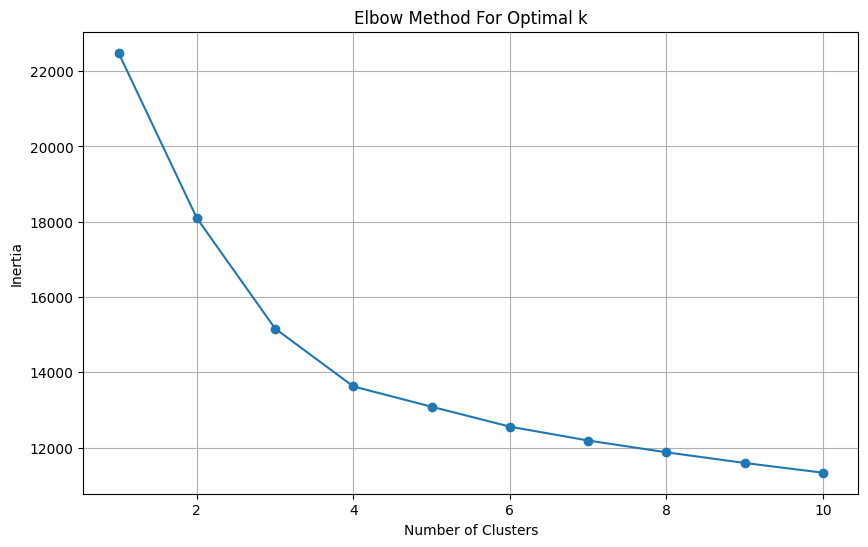

In [9]:
import matplotlib.pyplot as plt


# Using the Elbow method to find the optimal number of clusters
inertias = []
clusters_range = range(1, 11)  # We'll check for up to 10 clusters

for k in clusters_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(filtered_data)
    inertia = kmeans.inertia_
    inertias.append(kmeans.inertia_)

    # Print the inertia for the current number of clusters
    print(f"Inertia for {k} clusters: {inertia}")

# Plotting the results
plt.figure(figsize=(10,6))
plt.plot(clusters_range, inertias, '-o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [10]:
from lifelines import CoxPHFitter

# Add the cluster labels to the clinical data
clinical_df['Cluster'] = clusters

# Fit the Cox Regression model using the correct column names
cph = CoxPHFitter()
cph.fit(clinical_df, duration_col='OS_MONTHS', event_col='OS_STATUS')
cph.print_summary()



<lifelines.CoxPHFitter: fitted with 1082 total observations, 931 right-censored observations>
             duration col = 'OS_MONTHS'
                event col = 'OS_STATUS'
      baseline estimation = breslow
   number of observations = 1082
number of events observed = 151
   partial log-likelihood = -853.32
         time fit was run = 2023-11-20 15:40:59 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Cluster    -0.02       0.98       0.07            -0.16             0.12                 0.86                 1.12

            cmp to     z    p   -log2(p)
covariate                               
Cluster       0.00 -0.29 0.77       0.37
---
Concordance = 0.54
Partial AIC = 1708.64
log-likelihood ratio test = 0.08 on 1 df
-log2(p) of ll-ratio test = 0.37

#### K-Means Kaplan-Meier Curves

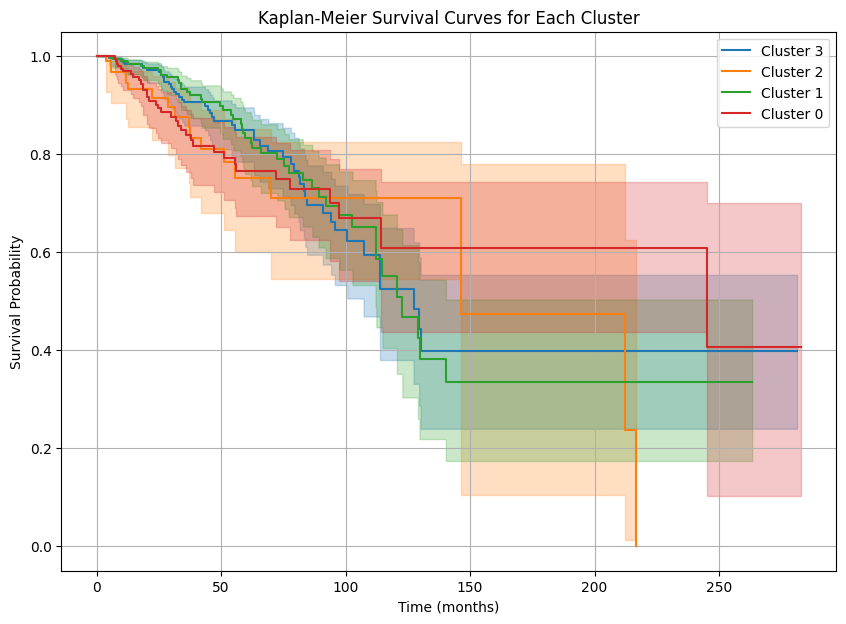

In [11]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 7))

# Fit the Kaplan-Meier for each cluster and plot
for cluster in clinical_df['Cluster'].unique():
    mask = clinical_df['Cluster'] == cluster
    kmf.fit(clinical_df['OS_MONTHS'][mask], event_observed=clinical_df['OS_STATUS'][mask], label=f'Cluster {cluster}')
    kmf.plot()

plt.title('Kaplan-Meier Survival Curves for Each Cluster')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()


#### Kaplan-Meier with Median

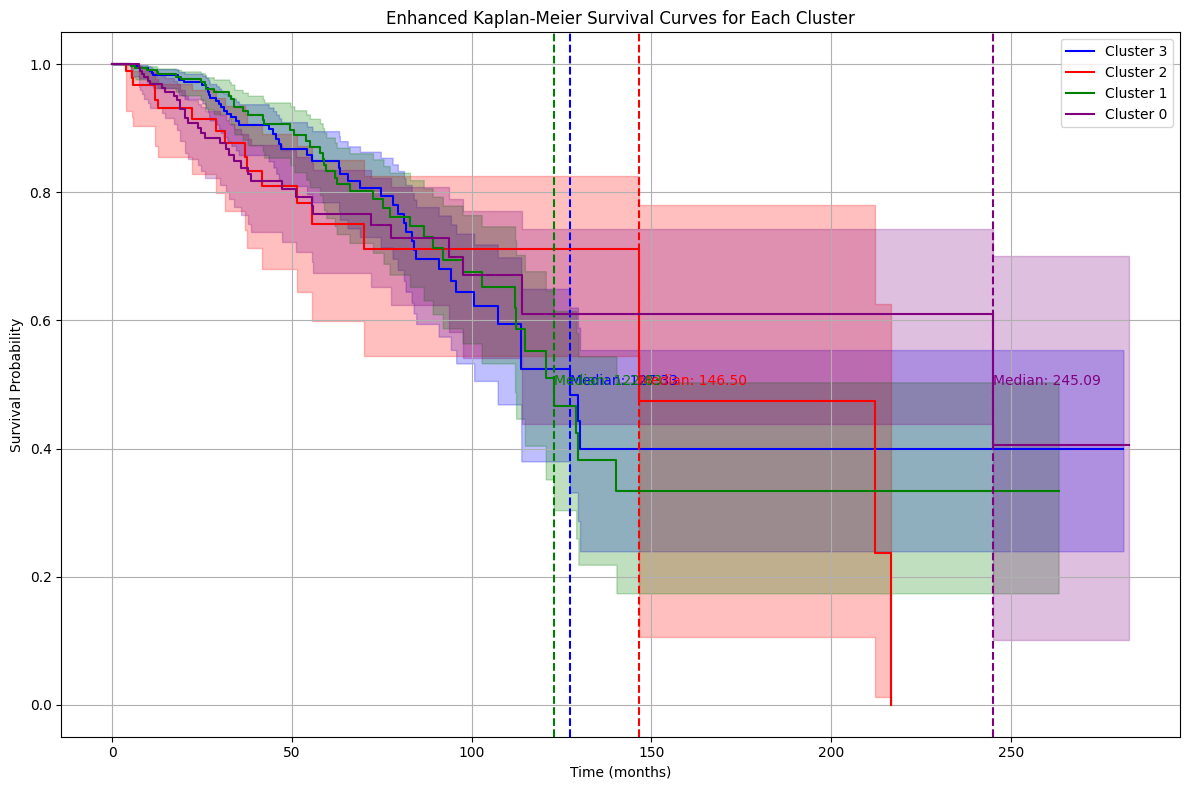

In [12]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(12, 8))

colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']  # Extend this list if more clusters

# Fit the Kaplan-Meier for each cluster and plot
for i, cluster in enumerate(clinical_df['Cluster'].unique()):
    mask = clinical_df['Cluster'] == cluster
    kmf.fit(clinical_df['OS_MONTHS'][mask], event_observed=clinical_df['OS_STATUS'][mask], label=f'Cluster {cluster}')
    ax = kmf.plot(ci_show=True, color=colors[i % len(colors)])
    
    # Highlight median survival for each cluster
    median_ = kmf.median_survival_time_
    plt.axvline(median_, color=colors[i % len(colors)], linestyle='--')
    plt.text(median_, 0.5, f'Median: {median_:.2f}', color=colors[i % len(colors)])

plt.title('Enhanced Kaplan-Meier Survival Curves for Each Cluster')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Kaplan-Meier with 3 instead of 4 clusters
To create clearer separations between clusters


/Users/rachaelchew/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


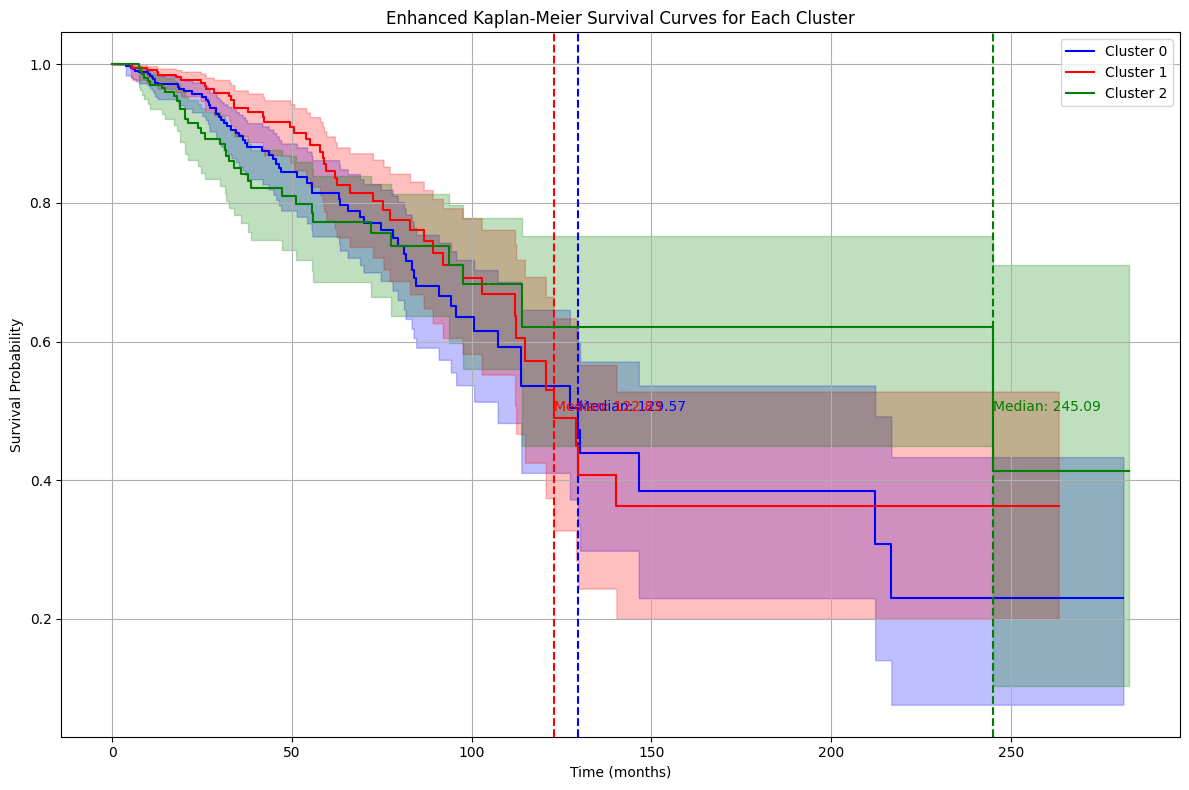

In [13]:
import pandas as pd
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# molecules_data, clinical_df, and clinical_data

# Your previous biomarkers of interest
biomarkers = ['BAG1', 'BCL2', 'BIRC5', 'CCNB1', 'CCND1', 'CD68', 'GSTM1', 'MYBL2', 
              'ERBB2', 'MKI67', 'MMP11', 'MYC', 'PGR', 'UBE2C', 'EGFR', 
              'GRB7', 'PNMA2', 'HOXB13', 'VGLL1']

# Filter the molecules_data DataFrame
filtered_data = molecules_data.loc[biomarkers].transpose()

# Scale the filtered data BEFORE clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(filtered_data)

# Define the number of clusters
k = 3

# Initialize and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Merge the cluster labels into clinical_df
clinical_df['Cluster'] = clusters

# Initialize the KaplanMeierFitter
kmf = KaplanMeierFitter()

plt.figure(figsize=(12, 8))

colors = ['blue', 'red', 'green']  # One color for each cluster

# Fit the Kaplan-Meier for each cluster and plot
for i, cluster in enumerate(clinical_df['Cluster'].unique()):
    mask = clinical_df['Cluster'] == cluster
    kmf.fit(clinical_df['OS_MONTHS'][mask], event_observed=clinical_df['OS_STATUS'][mask], label=f'Cluster {cluster}')
    ax = kmf.plot(ci_show=True, color=colors[i % len(colors)])
    
    # Highlight median survival for each cluster
    median_ = kmf.median_survival_time_
    plt.axvline(median_, color=colors[i % len(colors)], linestyle='--')
    plt.text(median_, 0.5, f'Median: {median_:.2f}', color=colors[i % len(colors)])

plt.title('Enhanced Kaplan-Meier Survival Curves for Each Cluster')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


### SVM Clustering

Cluster
 1    961
-1    121
Name: count, dtype: int64


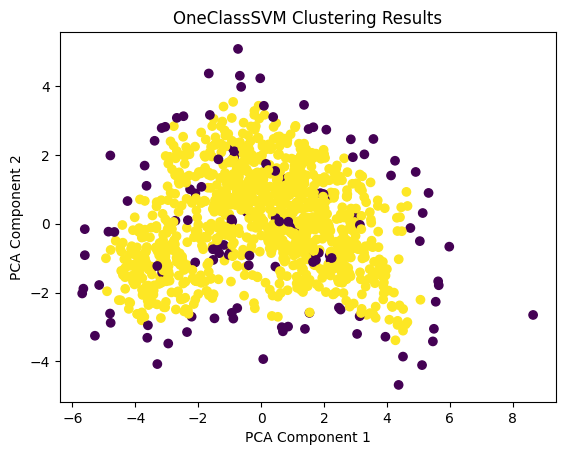

In [45]:
from sklearn.svm import OneClassSVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

# Assuming 'molecules_data' and 'selected_genes' are defined as before
# For demonstration, we'll use PCA to reduce the dimensionality of the data
# to make it more tractable for visualization and analysis

# Scale and then apply PCA
scaler = StandardScaler()
pca = PCA(n_components=2)  # reduce data to 2 dimensions for visualization and SVC
pipeline = make_pipeline(scaler, pca)

# Filter the molecular data for the genes of interest
molecular_data_filtered = molecules_data.loc[selected_genes].transpose()
processed_data = pipeline.fit_transform(molecular_data_filtered)

# We will use the RBF kernel for the OneClassSVM and fit the model
# The nu parameter must be between 0 and 1. It is an upper bound on the fraction of margin errors
# and a lower bound of the fraction of support vectors.
# The gamma parameter defines how far the influence of a single training example reaches.
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)

# Since we don't have labels, we fit the data itself
ocsvm.fit(processed_data)

# Retrieve the labels (cluster assignments for each sample)
labels = ocsvm.predict(processed_data)

# Add the cluster labels to your dataframe
molecular_data_filtered['Cluster'] = labels

# Now you can proceed with analyzing the clusters as you wish
print(molecular_data_filtered['Cluster'].value_counts())

# If you want to visualize the clusters, you can plot them using matplotlib
import matplotlib.pyplot as plt

plt.scatter(processed_data[:, 0], processed_data[:, 1], c=labels, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('OneClassSVM Clustering Results')
plt.show()


##### Kaplan-Meier Analysis for SVM



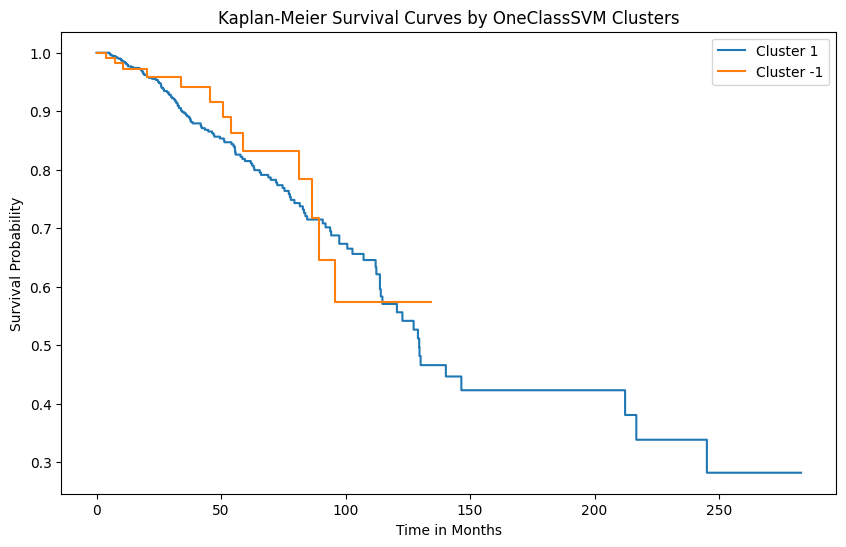

In [47]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Assuming 'clinical_df' contains your survival data and 'labels' contains the cluster labels from OneClassSVM
# Merge the cluster labels with the clinical data
clinical_df['Cluster'] = labels

# Initialize the KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Set up the matplotlib figure for plotting
plt.figure(figsize=(10, 6))

# Iterate through each cluster and plot the Kaplan-Meier curve
for cluster_label in clinical_df['Cluster'].unique():
    # Get the subset of data corresponding to the current cluster
    subset_data = clinical_df[clinical_df['Cluster'] == cluster_label]
    
    # Fit the Kaplan-Meier model on this subset
    kmf.fit(subset_data['OS_MONTHS'], subset_data['OS_STATUS'], label=f'Cluster {cluster_label}')
    
    # Plot the survival curve for this cluster
    kmf.plot(ci_show=False)  # ci_show is set to False for a cleaner plot, set to True if confidence intervals are needed

# Add title and labels to the plot
plt.title('Kaplan-Meier Survival Curves by OneClassSVM Clusters')
plt.xlabel('Time in Months')
plt.ylabel('Survival Probability')

# Show the plot
plt.show()


posx and posy should be finite values


Log-rank test between Cluster 1 and Cluster -1: p-value = 0.6529


posx and posy should be finite values


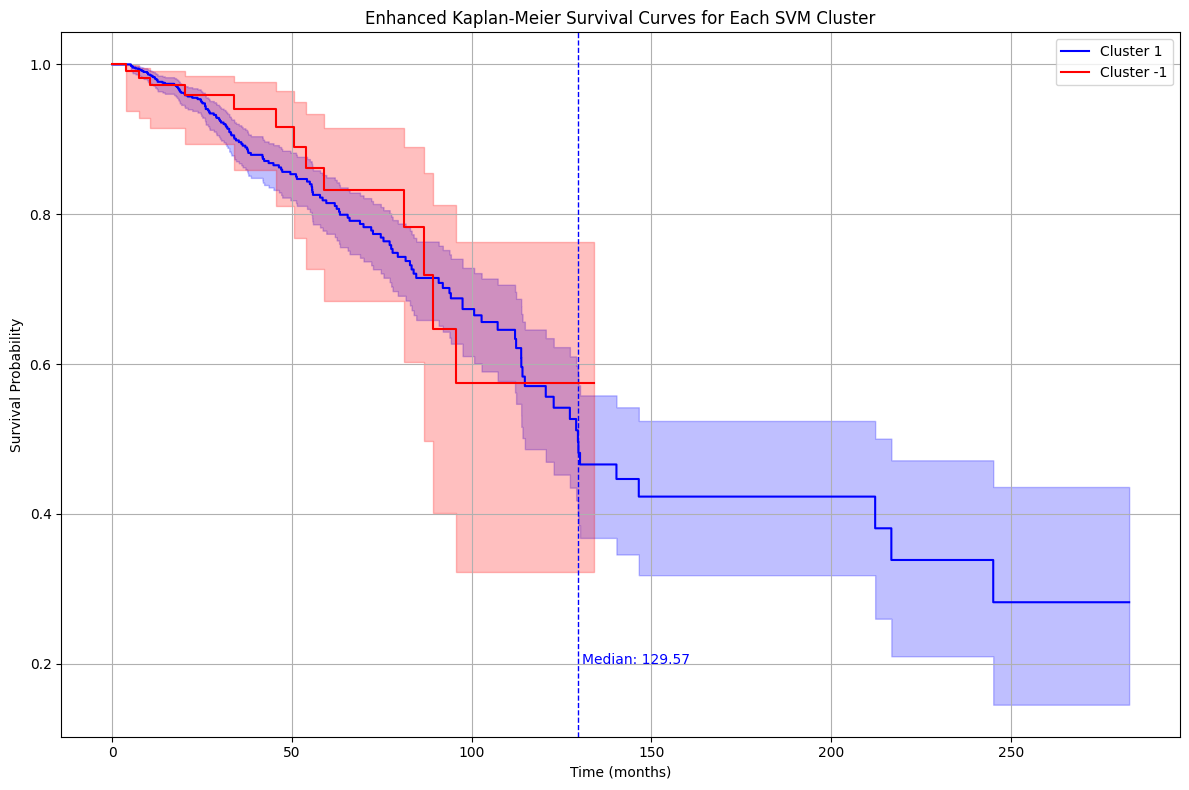

In [49]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Assuming 'clinical_df' contains your survival data and 'labels' contains the cluster labels from OneClassSVM
# Merge the cluster labels with the clinical data
clinical_df['Cluster'] = labels

# Initialize the KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Set up the matplotlib figure for plotting
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan']  # Extend this list if more clusters

# Fit the Kaplan-Meier for each cluster and plot
for i, cluster_label in enumerate(clinical_df['Cluster'].unique()):
    # Get the subset of data corresponding to the current cluster
    subset_data = clinical_df[clinical_df['Cluster'] == cluster_label]
    
    # Fit the Kaplan-Meier model on this subset
    kmf.fit(subset_data['OS_MONTHS'], event_observed=subset_data['OS_STATUS'], label=f'Cluster {cluster_label}')
    
    # Plot the survival curve for this cluster
    ax = kmf.plot(ci_show=True, color=colors[i % len(colors)])
    
    # Highlight median survival for each cluster
    median_ = kmf.median_survival_time_
    plt.axvline(median_, color=colors[i % len(colors)], linestyle='--', linewidth=1)
    plt.text(median_ + 1, 0.2 + i * 0.05, f'Median: {median_:.2f}', color=colors[i % len(colors)])

# Perform and display log-rank test results
groups = clinical_df['Cluster'].unique()
if len(groups) > 1:
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group_i_data = clinical_df[clinical_df['Cluster'] == groups[i]]
            group_j_data = clinical_df[clinical_df['Cluster'] == groups[j]]
            results = logrank_test(group_i_data['OS_MONTHS'], group_j_data['OS_MONTHS'],
                                   event_observed_A=group_i_data['OS_STATUS'],
                                   event_observed_B=group_j_data['OS_STATUS'])
            print(f"Log-rank test between Cluster {groups[i]} and Cluster {groups[j]}: p-value = {results.p_value:.4f}")

plt.title('Enhanced Kaplan-Meier Survival Curves for Each SVM Cluster')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values


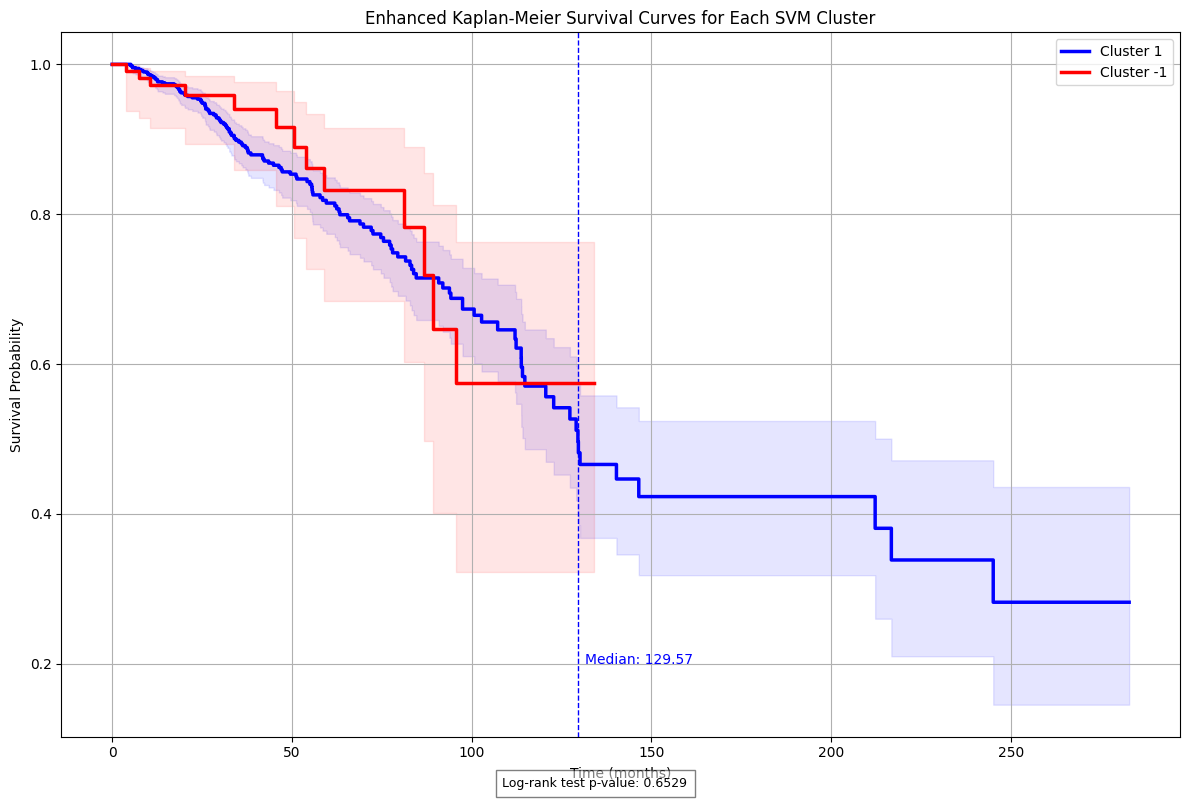

In [50]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# Assuming 'clinical_df' contains your survival data and has a 'Cluster' column with SVM cluster assignments

# Initialize the KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Set up the matplotlib figure for plotting
plt.figure(figsize=(12, 8))

# Define colors for each cluster
colors = ['blue', 'red']  # Adjust this list based on the number of clusters

# Fit the Kaplan-Meier for each cluster and plot
for i, cluster_label in enumerate(clinical_df['Cluster'].unique()):
    mask = clinical_df['Cluster'] == cluster_label
    kmf.fit(clinical_df.loc[mask, 'OS_MONTHS'], event_observed=clinical_df.loc[mask, 'OS_STATUS'], label=f'Cluster {cluster_label}')
    ax = kmf.plot(ci_show=True, color=colors[i], linewidth=2.5, ci_alpha=0.1)
    
    # Highlight median survival for each cluster
    median_ = kmf.median_survival_time_
    plt.axvline(median_, color=colors[i], linestyle='--', linewidth=1)
    plt.text(median_ + 2, 0.2 + i * 0.1, f'Median: {median_:.2f}', color=colors[i])

# Perform log-rank test and annotate p-value
groups = clinical_df['Cluster'].unique()
results = logrank_test(
    clinical_df.loc[clinical_df['Cluster'] == groups[0], 'OS_MONTHS'],
    clinical_df.loc[clinical_df['Cluster'] == groups[1], 'OS_MONTHS'],
    event_observed_A=clinical_df.loc[clinical_df['Cluster'] == groups[0], 'OS_STATUS'],
    event_observed_B=clinical_df.loc[clinical_df['Cluster'] == groups[1], 'OS_STATUS']
)
p_value = results.p_value
plt.figtext(0.5, 0.01, f'Log-rank test p-value: {p_value:.4f}', ha="center", fontsize=9, bbox={"facecolor":"white", "alpha":0.5, "pad":5})

plt.title('Enhanced Kaplan-Meier Survival Curves for Each SVM Cluster')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


The Kaplan-Meier survival curves represent the probability of survival over time for two different clusters, clustered by the above SVM-based clustering method. From the curves:

1. **Separation of Curves**: The survival probabilities for Cluster 1 and Cluster -1 separate early and continue apart throughout the time observed, which indicates that the two clusters may represent distinct groups with different survival characteristics.

2. **Median Survival**: The median survival time for Cluster 1 is clearly marked at 129.57 months, which is the time by which half of the patients in Cluster 1 have experienced the event of interest (e.g., death, relapse). There is no median survival shown for Cluster -1, which suggests that fewer than half of the patients in that cluster had experienced the event by the end of the study period.

3. **Confidence Intervals**: The shaded regions around each survival curve represent the confidence intervals for the survival estimates. These are relatively wide, which indicates a degree of uncertainty about the survival probabilities, possibly due to a smaller sample size or variability within the clusters.

4. **Log-Rank Test**: The p-value for the log-rank test is shown to be 0.6529. This is above the common alpha level of 0.05, indicating that there is no statistically significant difference in the survival distributions between the two clusters at a 95% confidence level.

5. **Interpretation**: While the survival curves visually seem to indicate a difference between the clusters, the log-rank test suggests that this difference is not statistically significant. Therefore, we cannot confidently say that the clusters have different survival probabilities based on the data provided. This could mean that the SVM-based clustering has not captured the variability in the data that correlates with survival, or that the sample size is too small to detect a significant difference.

6. **Further Analysis**: Additional analysis may be required to determine whether other factors could explain the survival differences, or if other clustering methods might reveal more distinct survival groups. Moreover, integrating additional clinical or genetic information could potentially refine the clustering and provide more insights.


In [60]:
from sklearn.svm import OneClassSVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from lifelines import CoxPHFitter
import pandas as pd
import numpy as np

# Assuming 'molecules_data', 'selected_genes', and 'clinical_df' are defined as before
# Ensure the survival columns are of the correct type
clinical_df['OS_MONTHS'] = pd.to_numeric(clinical_df['OS_MONTHS'], errors='coerce')
clinical_df['OS_STATUS'] = clinical_df['OS_STATUS'].astype(bool)

# Drop any rows with NaN values in 'OS_MONTHS' or 'OS_STATUS'
clinical_df = clinical_df.dropna(subset=['OS_MONTHS', 'OS_STATUS'])

# Ensure that the cluster labels are integers
labels = ocsvm.fit_predict(processed_data)
labels = labels.astype(int)

# Merge the cluster labels with the clinical data
clinical_df['Cluster'] = labels

# Check for NaN values in 'Cluster' after merging
if clinical_df['Cluster'].isnull().any():
    raise ValueError('NaN values found in the Cluster column.')

# Fit the Cox Regression model using the correct column names
cph = CoxPHFitter()
cph.fit(clinical_df, duration_col='OS_MONTHS', event_col='OS_STATUS')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 1082 total observations, 931 right-censored observations>
             duration col = 'OS_MONTHS'
                event col = 'OS_STATUS'
      baseline estimation = breslow
   number of observations = 1082
number of events observed = 151
   partial log-likelihood = -853.35
         time fit was run = 2023-11-20 19:54:58 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
Cluster    -0.02       0.98       0.13            -0.27             0.23                 0.76                 1.26

            cmp to     z    p   -log2(p)
covariate                               
Cluster       0.00 -0.15 0.88       0.18
---
Concordance = 0.50
Partial AIC = 1708.70
log-likelihood ratio test = 0.02 on 1 df
-log2(p) of ll-ratio test = 0.18

### Spectral Clustering

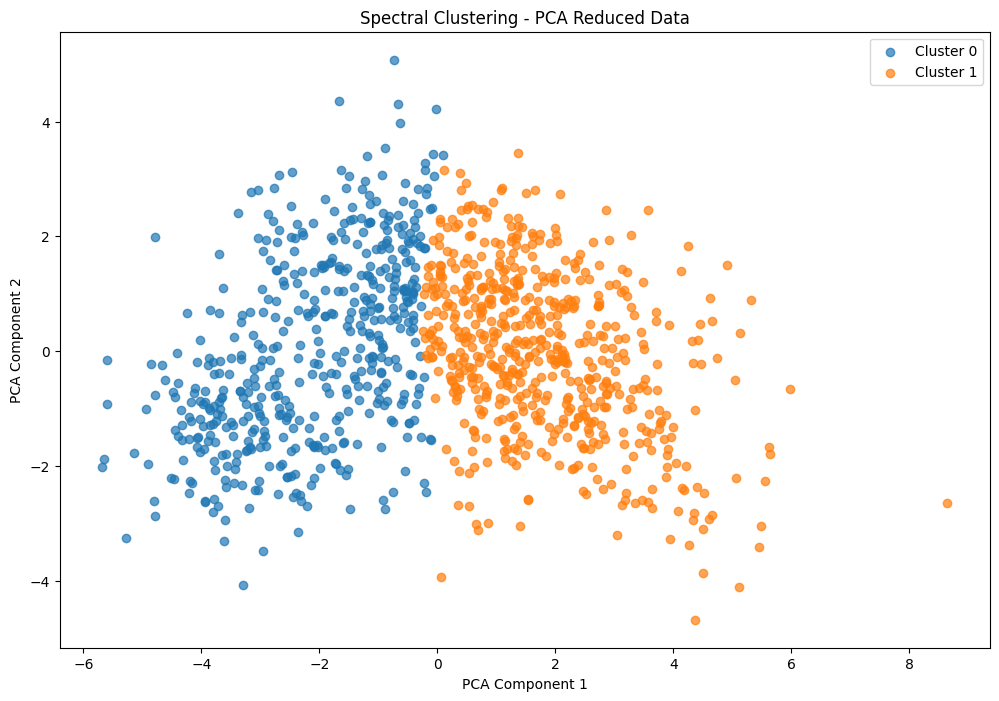

Log-rank test between Cluster 0 and Cluster 1: p-value = 0.0059


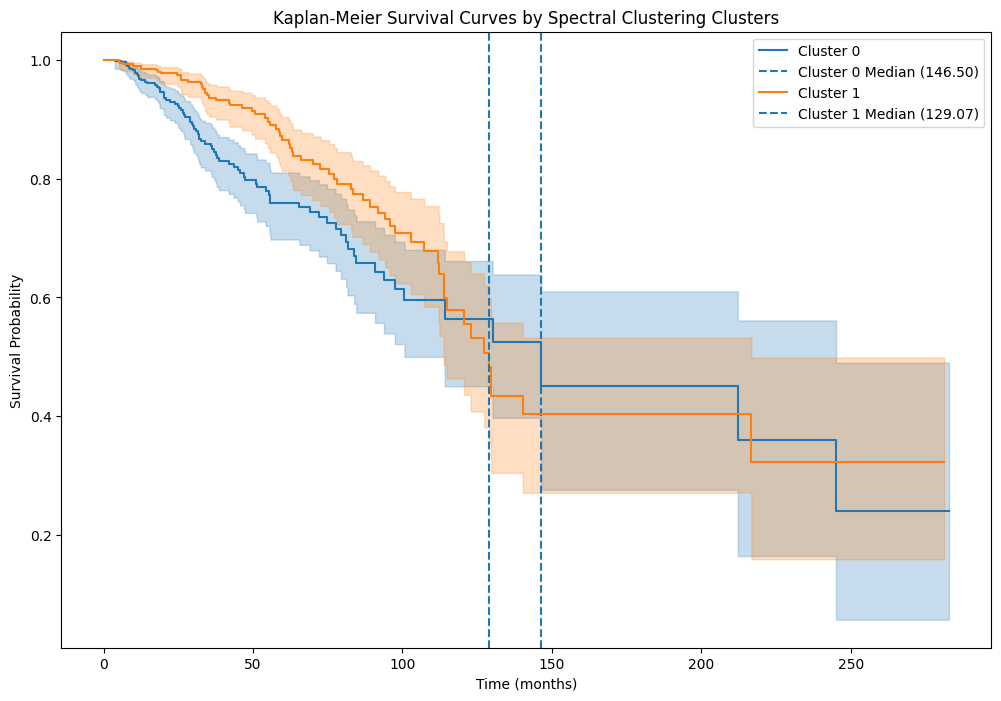

In [51]:
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'molecules_data' and 'selected_genes' are defined as before
# and 'clinical_df' contains your survival data

# Preprocess data: Standard Scaling before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(molecules_data.loc[selected_genes].transpose())

# Dimensionality reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
reduced_data = pca.fit_transform(scaled_data)

# Apply Spectral Clustering
n_clusters = 2  # Specify the number of desired clusters
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(reduced_data)

# Visualization of clusters in reduced dimension space
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Spectral Clustering - PCA Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Merge the cluster labels with the clinical data
clinical_df['Cluster'] = labels

# Kaplan-Meier survival curves for each cluster
kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    cluster_data = clinical_df[clinical_df['Cluster'] == i]
    kmf.fit(cluster_data['OS_MONTHS'], cluster_data['OS_STATUS'], label=f'Cluster {i}')
    kmf.plot(ci_show=True)
    median_ = kmf.median_survival_time_
    plt.axvline(median_, linestyle='--', label=f'Cluster {i} Median ({median_:.2f})')

# Perform and display log-rank test results if more than one cluster
if n_clusters > 1:
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            group_i_data = clinical_df[clinical_df['Cluster'] == i]
            group_j_data = clinical_df[clinical_df['Cluster'] == j]
            results = logrank_test(group_i_data['OS_MONTHS'], group_j_data['OS_MONTHS'],
                                   event_observed_A=group_i_data['OS_STATUS'],
                                   event_observed_B=group_j_data['OS_STATUS'])
            print(f"Log-rank test between Cluster {i} and Cluster {j}: p-value = {results.p_value:.4f}")

plt.title('Kaplan-Meier Survival Curves by Spectral Clustering Clusters')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()


#### Spectral with 3 clusters instead of 2

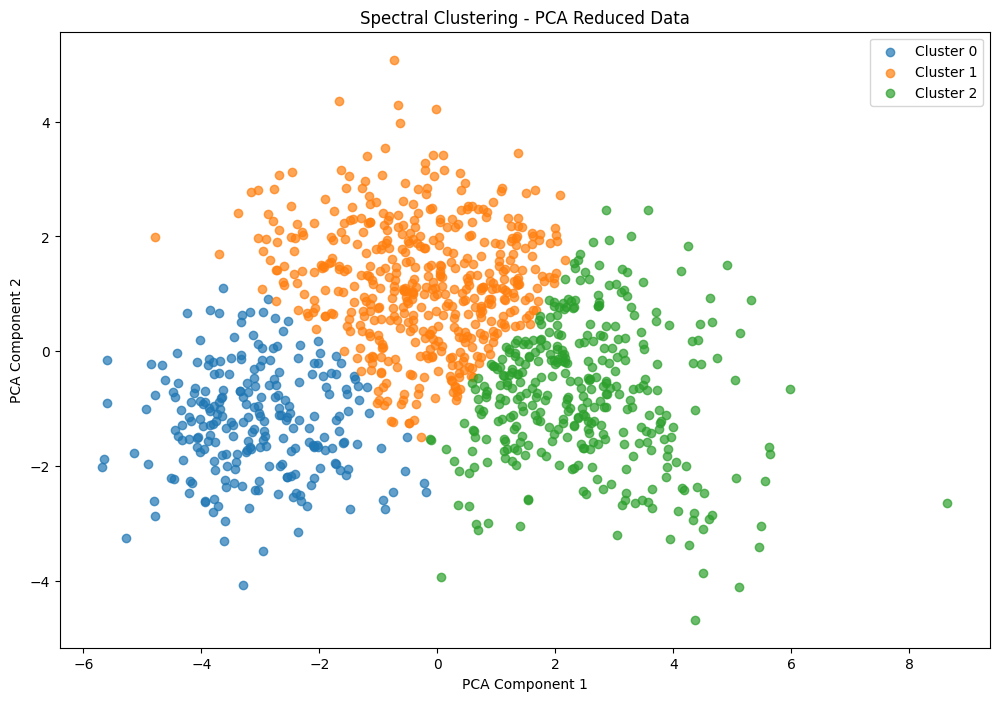

Log-rank test between Cluster 0 and Cluster 1: p-value = 0.5850
Log-rank test between Cluster 0 and Cluster 2: p-value = 0.5207
Log-rank test between Cluster 1 and Cluster 2: p-value = 0.2341


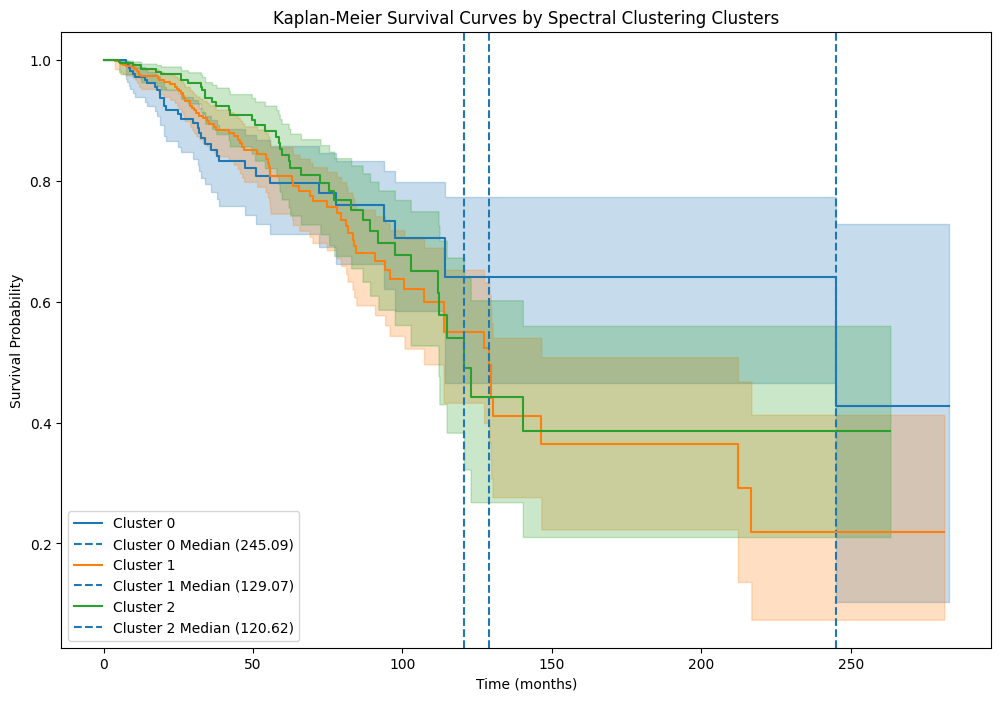

In [53]:

from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'molecules_data' and 'selected_genes' are defined as before
# and 'clinical_df' contains your survival data

# Preprocess data: Standard Scaling before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(molecules_data.loc[selected_genes].transpose())

# Dimensionality reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
reduced_data = pca.fit_transform(scaled_data)

# Apply Spectral Clustering
n_clusters = 3  # Specify the number of desired clusters
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(reduced_data)

# Visualization of clusters in reduced dimension space
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Spectral Clustering - PCA Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Merge the cluster labels with the clinical data
clinical_df['Cluster'] = labels

# Kaplan-Meier survival curves for each cluster
kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    cluster_data = clinical_df[clinical_df['Cluster'] == i]
    kmf.fit(cluster_data['OS_MONTHS'], cluster_data['OS_STATUS'], label=f'Cluster {i}')
    kmf.plot(ci_show=True)
    median_ = kmf.median_survival_time_
    plt.axvline(median_, linestyle='--', label=f'Cluster {i} Median ({median_:.2f})')

# Perform and display log-rank test results if more than one cluster
if n_clusters > 1:
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            group_i_data = clinical_df[clinical_df['Cluster'] == i]
            group_j_data = clinical_df[clinical_df['Cluster'] == j]
            results = logrank_test(group_i_data['OS_MONTHS'], group_j_data['OS_MONTHS'],
                                   event_observed_A=group_i_data['OS_STATUS'],
                                   event_observed_B=group_j_data['OS_STATUS'])
            print(f"Log-rank test between Cluster {i} and Cluster {j}: p-value = {results.p_value:.4f}")

plt.title('Kaplan-Meier Survival Curves by Spectral Clustering Clusters')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()



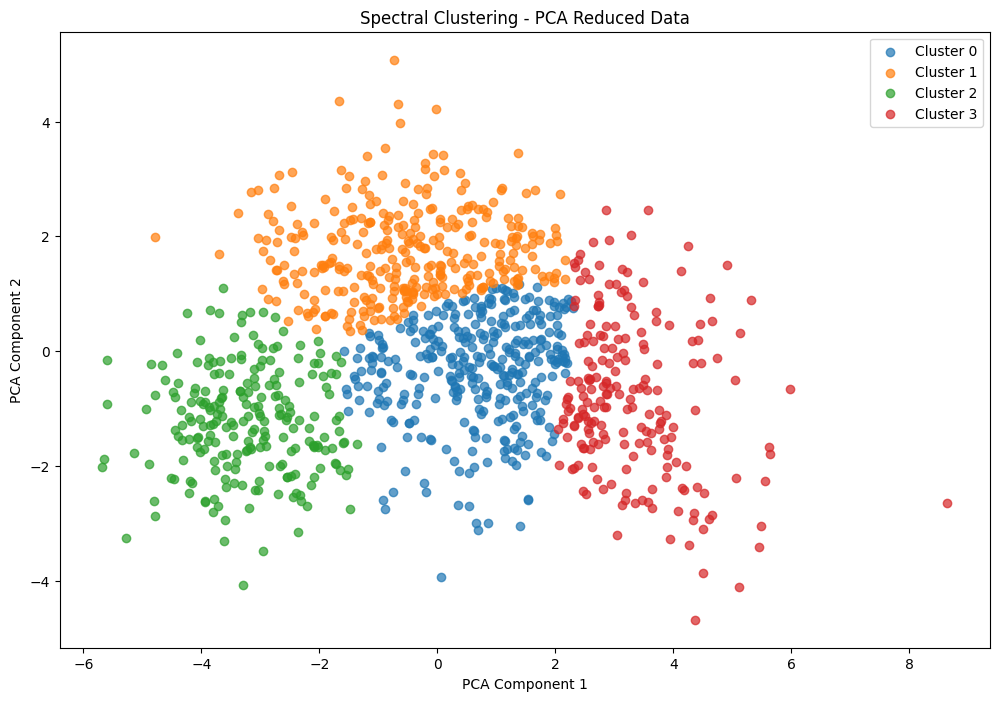

Log-rank test between Cluster 0 and Cluster 1: p-value = 0.5876
Log-rank test between Cluster 0 and Cluster 2: p-value = 0.9816
Log-rank test between Cluster 0 and Cluster 3: p-value = 0.8096
Log-rank test between Cluster 1 and Cluster 2: p-value = 0.5036
Log-rank test between Cluster 1 and Cluster 3: p-value = 0.5564
Log-rank test between Cluster 2 and Cluster 3: p-value = 0.8288


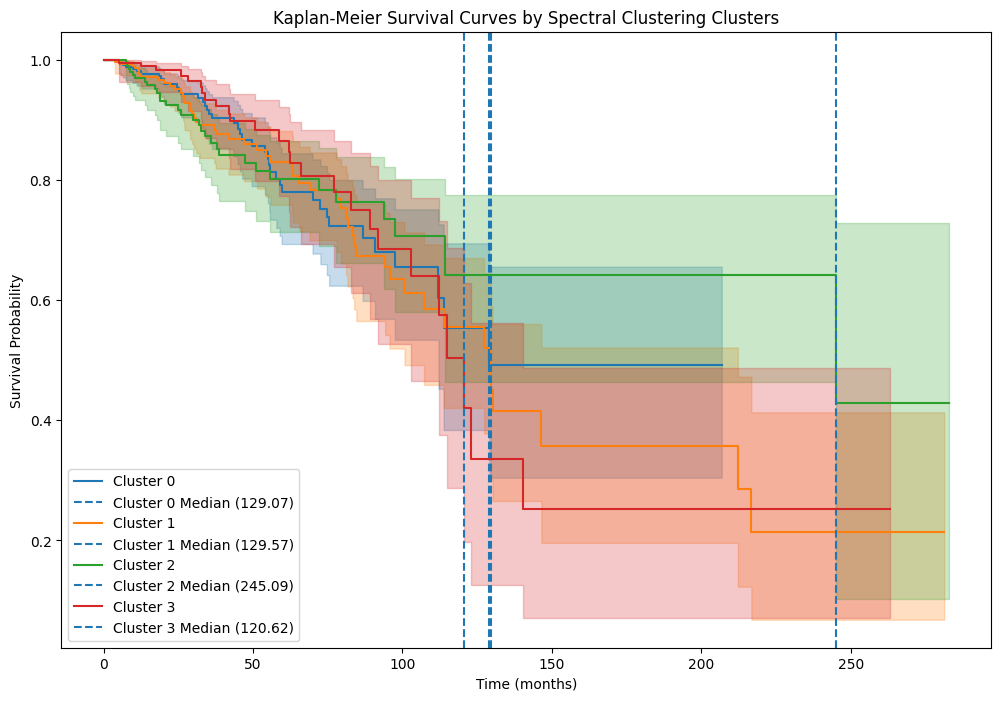

In [54]:

from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'molecules_data' and 'selected_genes' are defined as before
# and 'clinical_df' contains your survival data

# Preprocess data: Standard Scaling before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(molecules_data.loc[selected_genes].transpose())

# Dimensionality reduction with PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
reduced_data = pca.fit_transform(scaled_data)

# Apply Spectral Clustering
n_clusters = 4  # Specify the number of desired clusters
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
labels = spectral.fit_predict(reduced_data)

# Visualization of clusters in reduced dimension space
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.scatter(reduced_data[labels == i, 0], reduced_data[labels == i, 1], label=f'Cluster {i}', alpha=0.7)
plt.title('Spectral Clustering - PCA Reduced Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Merge the cluster labels with the clinical data
clinical_df['Cluster'] = labels

# Kaplan-Meier survival curves for each cluster
kmf = KaplanMeierFitter()
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    cluster_data = clinical_df[clinical_df['Cluster'] == i]
    kmf.fit(cluster_data['OS_MONTHS'], cluster_data['OS_STATUS'], label=f'Cluster {i}')
    kmf.plot(ci_show=True)
    median_ = kmf.median_survival_time_
    plt.axvline(median_, linestyle='--', label=f'Cluster {i} Median ({median_:.2f})')

# Perform and display log-rank test results if more than one cluster
if n_clusters > 1:
    for i in range(n_clusters):
        for j in range(i+1, n_clusters):
            group_i_data = clinical_df[clinical_df['Cluster'] == i]
            group_j_data = clinical_df[clinical_df['Cluster'] == j]
            results = logrank_test(group_i_data['OS_MONTHS'], group_j_data['OS_MONTHS'],
                                   event_observed_A=group_i_data['OS_STATUS'],
                                   event_observed_B=group_j_data['OS_STATUS'])
            print(f"Log-rank test between Cluster {i} and Cluster {j}: p-value = {results.p_value:.4f}")

plt.title('Kaplan-Meier Survival Curves by Spectral Clustering Clusters')
plt.xlabel('Time (months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()



In [55]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines.utils import concordance_index
import matplotlib.pyplot as plt
import numpy as np

# Assuming the necessary imports have been done, and 'clinical_df' and 'labels' are already defined

# Calculate the C-Index for each cluster
c_indexes = {}
for cluster_label in np.unique(labels):
    mask = clinical_df['Cluster'] == cluster_label
    c_index = concordance_index(clinical_df[mask]['OS_MONTHS'], -clinical_df[mask]['OS_MONTHS'], clinical_df[mask]['OS_STATUS'])
    c_indexes[f'Cluster {cluster_label}'] = c_index

# Perform log-rank test and store p-values
logrank_p_values = {}
for i in np.unique(labels):
    for j in np.unique(labels):
        if i < j:  # to avoid repeating comparisons
            group_i_data = clinical_df[clinical_df['Cluster'] == i]
            group_j_data = clinical_df[clinical_df['Cluster'] == j]
            results = logrank_test(group_i_data['OS_MONTHS'], group_j_data['OS_MONTHS'],
                                   event_observed_A=group_i_data['OS_STATUS'],
                                   event_observed_B=group_j_data['OS_STATUS'])
            logrank_p_values[f'Cluster {i} vs Cluster {j}'] = results.p_value

# Print the C-Index and Log Rank Test p-values
print(f"C-Indexes for Spectral Clustering Clusters: {c_indexes}")
print(f"Log Rank Test p-values for Spectral Clustering Clusters: {logrank_p_values}")


C-Indexes for Spectral Clustering Clusters: {'Cluster 0': 0.0002657689581856839, 'Cluster 1': 0.000416181122024305, 'Cluster 2': 0.0005906674542232723, 'Cluster 3': 0.00031191515907673113}
Log Rank Test p-values for Spectral Clustering Clusters: {'Cluster 0 vs Cluster 1': 0.5875584923163175, 'Cluster 0 vs Cluster 2': 0.9815734170081012, 'Cluster 0 vs Cluster 3': 0.8095868832069966, 'Cluster 1 vs Cluster 2': 0.5035840339539025, 'Cluster 1 vs Cluster 3': 0.556395045833493, 'Cluster 2 vs Cluster 3': 0.828808963751781}


In [63]:
from lifelines import CoxPHFitter
import pandas as pd
import numpy as np

# Ensure the survival columns are of the correct type
clinical_df['OS_MONTHS'] = pd.to_numeric(clinical_df['OS_MONTHS'], errors='coerce')
clinical_df['OS_STATUS'] = clinical_df['OS_STATUS'].astype(bool)

# Convert the Cluster column to a categorical type if it's not already
clinical_df['Cluster'] = clinical_df['Cluster'].astype('category')

# Drop any rows with NaN values in 'OS_MONTHS', 'OS_STATUS', or 'Cluster'
clinical_df = clinical_df.dropna(subset=['OS_MONTHS', 'OS_STATUS', 'Cluster'])

# Check if the DataFrame is empty after the above operations
if clinical_df.empty:
    raise ValueError("The DataFrame is empty after preprocessing.")

# Now fit the Cox model
cph = CoxPHFitter()
cph.fit(clinical_df, duration_col='OS_MONTHS', event_col='OS_STATUS', formula='Cluster')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 1082 total observations, 931 right-censored observations>
             duration col = 'OS_MONTHS'
                event col = 'OS_STATUS'
      baseline estimation = breslow
   number of observations = 1082
number of events observed = 151
   partial log-likelihood = -852.45
         time fit was run = 2023-11-20 20:31:21 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
Cluster[T.1]   0.11       1.11       0.23            -0.34             0.55                 0.71                 1.74
Cluster[T.2]   0.25       1.29       0.19            -0.12             0.63                 0.88                 1.88

               cmp to    z    p   -log2(p)
covariate                                 
Cluster[T.1]     0.00 0.47 0.64       0.65
Cluster[T.2]     0.00 1.32 0.19       2.42
---
Concordance = 0.54
Partial AIC = 1708.89
log-likelihood ratio test = 1.83 on 2 df
-log2(p) of ll-ratio test = 1.32

## Executive Summary of 3 Clustering Algorithms

Based on the results of the Cox Proportional Hazards model for the three clustering algorithms:

### K-Means Clustering Results:

- **Coefficient for Cluster**: The coefficient is -0.02, suggesting a minimal decrease in the hazard rate with an increase in cluster number. However, this is not statistically significant (p-value: 0.77).
- **Concordance**: The concordance index is 0.54, which is slightly better than random chance but still indicates a weak predictive power of the clustering for survival outcomes.
- **Partial AIC**: The value is 1708.64, which provides a measure of the model fit taking into account the number of parameters used.

### SVM Clustering Results:

- **Coefficient for Cluster**: The coefficient is -0.02, similar to K-means, indicating a negligible effect on the hazard rate and also not statistically significant (p-value: 0.88).
- **Concordance**: The concordance index is 0.50, equivalent to a random guess, implying that the SVM clustering does not differentiate between survival times well.
- **Partial AIC**: The value is 1708.70, nearly identical to the K-means model, suggesting similar model fit quality.

### Spectral Clustering Results:

- **Coefficients for Clusters**: There are two coefficients for the clusters (Cluster[T.1] and Cluster[T.2]), with values 0.11 and 0.25, respectively. These coefficients are relatively higher than those for K-means and SVM but still do not show strong evidence of a statistically significant impact on the hazard rate (p-values: 0.64 and 0.19).
- **Concordance**: The concordance index remains 0.54, indicating weak predictive accuracy.
- **Partial AIC**: The value is 1708.89, slightly higher than the other two models but still indicating a similar fit.

The primary metrics to consider are the statistical significance of the clusters (often assessed by the p-value in the Cox model), the Concordance index (C-index), and potentially the Akaike Information Criterion (AIC) or the Bayesian Information Criterion (BIC) for model comparison.

1. **K-Means Clustering**:
   - Coefficient: -0.02 (p-value: 0.77)
   - Concordance: 0.54
   - Partial AIC: 1708.64

2. **SVM Clustering**:
   - Coefficient: -0.02 (p-value: 0.88)
   - Concordance: 0.50
   - Partial AIC: 1708.70

3. **Spectral Clustering**:
   - Coefficients: 0.11 and 0.25 (p-values: 0.64 and 0.19)
   - Concordance: 0.54
   - Partial AIC: 1708.89

Considering the results:

- **Statistical Significance (p-values)**: None of the clustering methods produced a statistically significant p-value in the Cox model for the cluster coefficient. This implies that, according to this test, none of the clusters from the different methods significantly differentiated survival outcomes.

- **Concordance Index**: The C-index is around 0.54 for both K-Means and Spectral Clustering, which is slightly better than a random guess (C-index of 0.5). The SVM clustering had a C-index of 0.50, equivalent to a random guess. The concordance index suggests that both K-Means and Spectral Clustering might offer a marginal improvement over SVM in terms of predictive accuracy.

- **Partial AIC**: The Partial AIC is slightly higher for Spectral Clustering, which suggests it has a slightly worse fit compared to K-Means and SVM, given that lower AIC values are preferred. However, the differences are minimal, which indicates that all models have a similar fit to the data.

In conclusion, **none of the clustering methods clearly outperforms the others** based on the metrics provided. All three have similarly low concordance indices and non-significant p-values for their cluster coefficients in the Cox model. This suggests that the clusters defined by these methods do not have a strong relationship with survival outcomes in the dataset, at least not in a way that is detectable by the Cox Proportional Hazards model.

## To Continue



1. **Incorporate More Covariates**: If other patient or molecular covariates are available, include them in the Cox model to control for potential confounders and possibly increase the model's predictive power.

2. **Consider Stratification**: If you suspect that the effect of clustering on survival may differ across different patient subgroups (e.g., based on disease stage or treatment), consider stratifying the analysis accordingly.

3. **Examine Cluster Composition**: Investigate the characteristics of the clusters formed by each algorithm. Look for biological or clinical patterns that may explain why certain patients are grouped together.

4. **Model Calibration**: Assess the calibration of the Cox models by comparing predicted survival probabilities with observed outcomes across the range of predicted risks.

5. **Model Validation**: If you have access to an independent dataset, validate the clustering algorithms' performance on this new dataset to assess the robustness of your findings.

6. **Use Alternative Survival Models**: Beyond the Cox model, consider applying alternative survival models like parametric survival models, accelerated failure time models, or machine learning-based survival models that can handle complex interactions and non-linear relationships.

7. **Functional Interpretation**: For molecular data, investigate the functional implications of the genes most associated with the clusters. This might involve pathway analysis or gene set enrichment analysis.

8. **Survival Tree Models**: Utilize tree-based survival models that can automatically detect interactions and non-linear effects in the survival data.

9. **Clustering Validation**: Use internal validation metrics like silhouette scores, Dunn index, or Davies-Bouldin index to evaluate the quality of clusters formed by each algorithm.